In [1]:
from keras.datasets import mnist
from scipy.misc import imrotate
from random import randint
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%pylab inline

Using Theano backend.


Populating the interactive namespace from numpy and matplotlib


C:\Users\KIM\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [412]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

In [413]:
(X_train_copy, y_train_copy), (X_test_copy, y_test_copy) = mnist.load_data() # fetch MNIST data

In [414]:
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# X_train_copy = X_train_copy / 255.0
# X_test_copy = X_test_copy / 255.0
# Это можно выполнить если ядро будет rbf, для него оценка получается лучше.

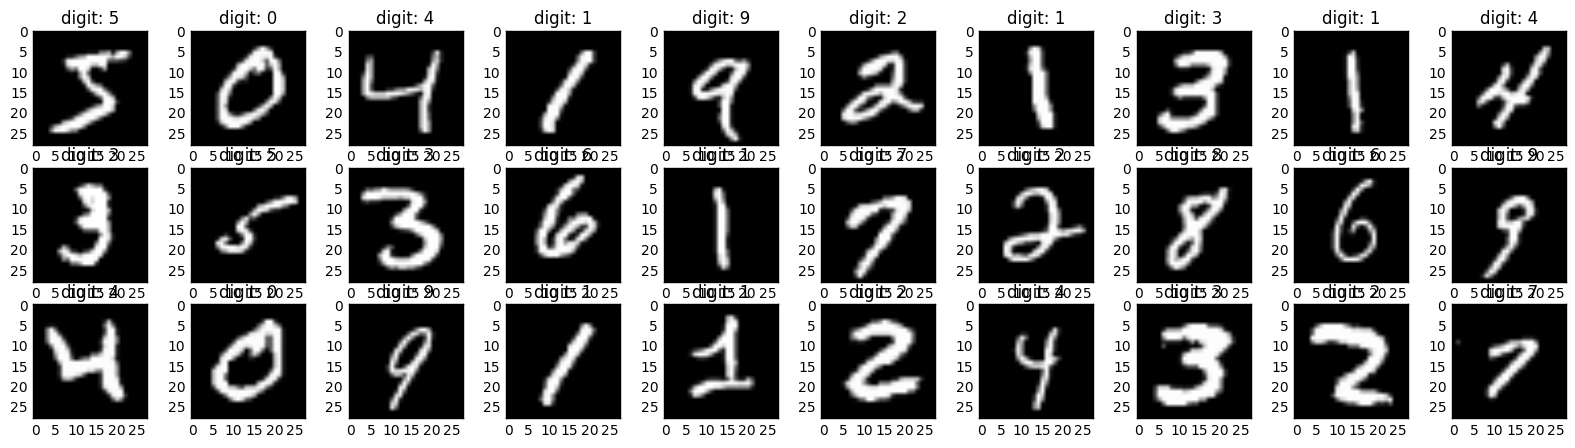

In [415]:
# Просто посмотрим цифры
pyplot.figure(figsize(20, 5))
for plot_number, plot in enumerate(X_train[:30]):
    pyplot.subplot(3, 10, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray')
    pylab.title('digit: ' + str(y_train[plot_number]))

In [416]:
#Функция для произвольных сдвиглв и поворотов
def rotate_and_shift(img):
    rotate = randint(-5,5)
    img = imrotate(img, rotate)
    shift = randint(-4,4)
    if (shift >= 0):
        X0 = np.zeros((28,shift))
        img = np.hstack((img,X0))
        img = delete(img, range(0, shift), 1)
    else:
        X0 = np.zeros((28,- shift))
        img = delete(img, range(28 + shift, 28), 1)
        img = np.hstack((X0, img)) 
    return img      
    

In [417]:
# Количество элементов для обучения и теста
N = 5000
X_modified = np.zeros((60000, 28, 28))
for i in range(0, N):
    X_modified[i] = rotate_and_shift(X_train_copy[i])

In [418]:
# Какие еще метрици следует рассмотреть при работе над данной задачей?
from sklearn import svm

cls_linear = svm.SVC(kernel='linear', C=2.8)
cls_rbf = svm.SVC(kernel='rbf',C=2.8, gamma=.0073)
cls_poly = svm.SVC(kernel='poly', C=2.8, gamma=.0073)

cls_linear2 = svm.SVC(kernel='linear', C=2.8)
cls_rbf2 = svm.SVC(kernel='rbf',C=2.8, gamma=.0073)
cls_poly2 = svm.SVC(kernel='poly')

cls_linear3 = svm.SVC(kernel='linear', C=2.8)
cls_rbf3 = svm.SVC(kernel='rbf',C=2.8, gamma=.0073)
cls_poly3 = svm.SVC(kernel='poly', C=2.8, gamma=.0073)

In [419]:
train_x_modified, test_x_modified, train_y_modified, test_y_modified = train_test_split(X_modified.reshape(60000, 784)[:N], y_train[:N], test_size=0.2)

train_x_orig, test_x_orig, train_y_orig, test_y_orig = train_test_split(X_train.reshape(60000, 784)[:N], y_train[:N], test_size=0.2)

In [420]:
print "Linear kernel:"
cls_linear.fit(train_x_modified, train_y_modified)
print "Modified:"
y_pred = cls_linear.predict(test_x_modified)
print(accuracy_score(test_y_modified, y_pred))


cls_linear2.fit(train_x_orig, train_y_orig)
print "Origin:"
y_pred2 = cls_linear2.predict(test_x_orig)
print(accuracy_score(test_y_orig, y_pred2))

Linear kernel:
Modified:
0.822
Origin:
0.905


In [421]:
print "RBF kernel:"
cls_rbf.fit(train_x_modified / 255.0, train_y_modified)
print "Modified:"
y_pred = cls_rbf.predict(test_x_modified / 255.0)
print(accuracy_score(test_y_modified, y_pred))

cls_rbf2.fit(train_x_orig / 255.0, train_y_orig)
print "Origin:"
y_pred2 = cls_rbf2.predict(test_x_orig / 255.0)
print(accuracy_score(test_y_orig, y_pred2))

RBF kernel:
Modified:
0.912
Origin:
0.944


In [422]:
print "Polynomial kernel:"
cls_poly.fit(train_x_modified, train_y_modified)
print "Modified:"
y_pred = cls_poly.predict(test_x_modified)
print(accuracy_score(test_y_modified, y_pred))

cls_poly2.fit(train_x_orig, train_y_orig)
print "Origin:"
y_pred2 = cls_poly2.predict(test_x_orig)
print(accuracy_score(test_y_orig, y_pred2))

Polynomial kernel:
Modified:
0.904
Origin:
0.94


In [423]:
# функция получения центра
def get_centre(img):
    sum_i = 0
    sum_j = 0
    sum_all = 0
    for i in range (0, 28):
        for j in range (0, 28):
            if (img[i,j] > 0):
                sum_i += i * img[i,j]
                sum_j += j * img[i,j]
                sum_all += img[i,j]
    return (int(round(sum_i / (sum_all))), int(round(sum_j / (sum_all))))                

In [424]:
# Функция для сдвига изображения на shift_i и shift_j в центр
def move_img(img, shift_i, shift_j):
    if (shift_i > 1):
        X0 = np.zeros((28, shift_i))
        img = delete(img, range(28 - shift_i, 28), 1)
        img = np.hstack((X0, img))       
    else:
        if (shift_i < 0):
            X0 = np.zeros((28, -shift_i))
            img = np.hstack((img,X0))
            img = delete(img, range(0, -shift_i), 1)

#Убрал так изначально я не добавлял случайные сдвиги по вертикали          
#     if (shift_j > 1):
#         X0 = np.zeros((shift_j, 28))
#         img = delete(img, range(28 - shift_j, 28), 0)
#         img = np.vstack((X0, img))        
#     else:
#         if (shift_j < 0):
#             X0 = np.zeros((-shift_j, 28))
#             img = np.vstack((img,X0))
#             img = delete(img, range(0, -shift_j), 0)
            
    return img    

In [425]:
def rotate_back(img):
    M = []

    for i in range (0, 28):
        for j in range (0, 28):
            if (img[i,j] > 0):
                M.append([i,j])

    M = np.array(M)
    transosed = transpose(M)
    _, vecs = np.linalg.eig(np.cov(transosed))
    y = np.array([vecs[:,0][0], 0])
    x = vecs[:,0]
    dot = np.dot(x,y)
    x_modulus = np.sqrt((x*x).sum())
    y_modulus = np.sqrt((y*y).sum())
    cos_angle = dot / x_modulus / y_modulus # cosine of angle between x and y
    angle = np.arccos(cos_angle)
    img = imrotate(img,angle * 360 / 2 / np.pi)
    return img

In [426]:
#Функция для восстановления центра изображения
def restore_shift(img):
    #img = rotate_back(img)# - убрал так как это ухудшает результат
    (i, j) = get_centre(img)
    img = move_img(img, 14 - i, 14 - j)
    return img

In [427]:
X_restored = np.zeros((60000, 28, 28))

for i in range(0, N):
    X_restored[i] = restore_shift(X_modified[i])

In [428]:
train_x_restored, test_x_restored, train_y_restored, test_y_restored = train_test_split(X_restored.reshape(60000, 784)[:N], y_train[:N], test_size=0.2)

In [429]:
print "Linear kernel:"
cls_linear.fit(train_x_restored, train_y_restored)
print "Restored:"
y_pred = cls_linear.predict(test_x_restored)
print(accuracy_score(test_y_restored, y_pred))


cls_linear2.fit(train_x_orig, train_y_orig)
print "Origin:"
y_pred2 = cls_linear2.predict(test_x_orig)
print(accuracy_score(test_y_orig, y_pred2))

Linear kernel:
Restored:
0.838
Origin:
0.905


In [430]:
print "RBF kernel:"
cls_rbf.fit(train_x_restored / 255.0, train_y_restored)
print "Restored:"
y_pred = cls_rbf.predict(test_x_restored / 255.0)
print(accuracy_score(test_y_restored, y_pred))

cls_rbf2.fit(train_x_orig / 255.0, train_y_orig)
print "Origin:"
y_pred2 = cls_rbf2.predict(test_x_orig / 255.0)
print(accuracy_score(test_y_orig, y_pred2))

RBF kernel:
Restored:
0.915
Origin:
0.944


In [431]:
# Берем полиномиальное ядро, так как оно показало лучше результат
print "Polynomial kernel:"
cls_poly3.fit(train_x_restored, train_y_restored)
print "Restored:"
y_pred3 = cls_poly3.predict(test_x_restored)
print(accuracy_score(test_y_restored, y_pred3))

Polynomial kernel:
Restored:
0.902


Вывод.
Лучше всего работает rbf ядро.
Для случайных небольших сдвигов и небольших поворотах помогает немного только сдвиг центра картинки в сторону центра квадрата 28 на 28.
Пытался применить поворот в сторону оси с максимальной дисперсией, но это только ухудшило результат.
RBF ядро работает только если все числа привести в диапозон из [0, 1].

In [118]:
# Это пример как можно поворачивать изображения на ось где максимальная дисперсия.
# Однако это только ухудшает результат

M = []
for i in range (0, 28):
    for j in range (0, 28):
        if (X_train[3][i,j] > 0):
            M.append([i,j])

M = np.array(M)
transosed = transpose(M)
_, vecs = np.linalg.eig(np.cov(transosed))
y = np.array([vecs[:,0][0], 0])
x = vecs[:,0]
dot = np.dot(x,y)
x_modulus = np.sqrt((x*x).sum())
y_modulus = np.sqrt((y*y).sum())
cos_angle = dot / x_modulus / y_modulus # cosine of angle between x and y
angle = np.arccos(cos_angle)
imrotate(X_train[3],angle * 360 / 2 / np.pi)

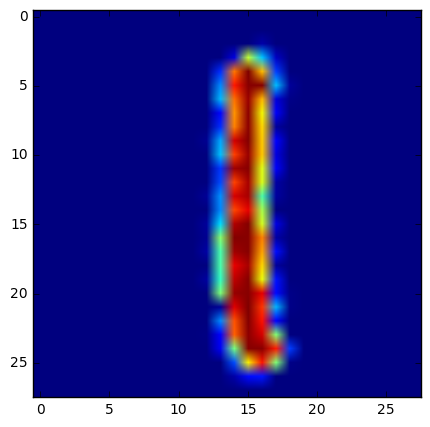

In [119]:
pylab.imshow(imrotate(X_train[3],angle * 360 / 2 / np.pi))

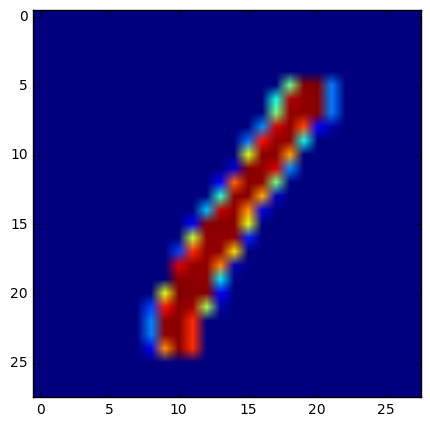

In [120]:
pylab.imshow(X_train[3])